In [12]:
## Import required Python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy, scipy.stats
import io
import base64
#from IPython.core.display import display
from IPython.display import display, HTML, Image
from urllib.request import urlopen

try:
    import astropy as apy
    import astropy.table
    _apy = True
    #print('Loaded astropy')
except:
    _apy = False
    #print('Could not load astropy')

## Customising the font size of figures
plt.rcParams.update({'font.size': 14})

## Customising the look of the notebook
display(HTML("<style>.container { width:95% !important; }</style>"))
## This custom file is adapted from https://github.com/lmarti/jupyter_custom/blob/master/custom.include
HTML('custom.css')
#HTML(urlopen('https://raw.githubusercontent.com/bretonr/intro_data_science/master/custom.css').read().decode('utf-8'))

In [13]:
## Adding a button to hide the Python source code
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the Python code."></form>''')

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10791: Introduction to Data Science</h1>
            <!--<h3>2019-2020 Academic Year</h3><br>-->
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
            <a href="http://www.renebreton.org">Prof. Rene Breton</a> - Twitter <a href="https://twitter.com/BretonRene">@BretonRene</a><br>
            <a href="http://www.hep.manchester.ac.uk/u/gersabec">Dr. Marco Gersabeck</a> - Twitter <a href="https://twitter.com/MarcoGersabeck">@MarcoGersabeck</a>
        </div>
    </div>
</div>

<div class="queue">
    Lecture 3 - 00:00
</div>

## 2.1 The importance of data visualisation

### Case study: The Anscombe Quartet

```
Anscombe's quartet comprises four datasets that have nearly identical simple descriptive statistics, yet appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers on statistical properties. He described the article as being intended to attack the impression among statisticians that "numerical calculations are exact, but graphs are rough.
```

<div style="text-align: right">[Anscombe Quartet (Wikipedia)](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)</div>

*Note: You are not expected to understand all the coding in this section, but rather to look at the concept and results. We present the code so you can learn coding tricks to read data, compute useful values, fit and plot data.*

**The data**

In [14]:
## Reading the Anscombe Quartet data an putting them in an array

from io import StringIO
c = StringIO("""
Ix  ,     Iy,   IIx,   IIy,  IIIx,   IIIy,   IVx,   IVy
10.0,  8.04 ,  10.0,  9.14,  10.0,  7.46 ,  8.0 ,  6.58 
8.0 ,  6.95 ,  8.0 ,  8.14,  8.0 ,  6.77 ,  8.0 ,  5.76 
13.0,  7.58 ,  13.0,  8.74,  13.0,  12.74,  8.0 ,  7.71 
9.0 ,  8.81 ,  9.0 ,  8.77,  9.0 ,  7.11 ,  8.0 ,  8.84 
11.0,  8.33 ,  11.0,  9.26,  11.0,  7.81 ,  8.0 ,  8.47 
14.0,  9.96 ,  14.0,  8.10,  14.0,  8.84 ,  8.0 ,  7.04 
6.0 ,  7.24 ,  6.0 ,  6.13,  6.0 ,  6.08 ,  8.0 ,  5.25 
4.0 ,  4.26 ,  4.0 ,  3.10,  4.0 ,  5.39 ,  19.0,  12.50
12.0,  10.84,  12.0,  9.13,  12.0,  8.15 ,  8.0 ,  5.56 
7.0 ,  4.82 ,  7.0 ,  7.26,  7.0 ,  6.42 ,  8.0 ,  7.91 
5.0 ,  5.68 ,  5.0 ,  4.74,  5.0 ,  5.73 ,  8.0 ,  6.89
""")
data = np.genfromtxt(c, delimiter=',', names=True)

apy.table.Table(data).pprint()

 Ix    Iy  IIx  IIy  IIIx  IIIy IVx  IVy 
---- ----- ---- ---- ---- ----- ---- ----
10.0  8.04 10.0 9.14 10.0  7.46  8.0 6.58
 8.0  6.95  8.0 8.14  8.0  6.77  8.0 5.76
13.0  7.58 13.0 8.74 13.0 12.74  8.0 7.71
 9.0  8.81  9.0 8.77  9.0  7.11  8.0 8.84
11.0  8.33 11.0 9.26 11.0  7.81  8.0 8.47
14.0  9.96 14.0  8.1 14.0  8.84  8.0 7.04
 6.0  7.24  6.0 6.13  6.0  6.08  8.0 5.25
 4.0  4.26  4.0  3.1  4.0  5.39 19.0 12.5
12.0 10.84 12.0 9.13 12.0  8.15  8.0 5.56
 7.0  4.82  7.0 7.26  7.0  6.42  8.0 7.91
 5.0  5.68  5.0 4.74  5.0  5.73  8.0 6.89


**Calculating statistical properties**

In [15]:

print('Mean of x:')
print('{:.2f}  {:.2f}  {:.2f}  {:.2f}'.format(data['Ix'].mean(),data['IIx'].mean(),data['IIIx'].mean(),data['IVx'].mean()))
print('')

print('Uncorrected sample standard deviation of x:')
print('{:.2f}  {:.2f}  {:.2f}  {:.2f}'.format(data['Ix'].std(),data['IIx'].std(),data['IIIx'].std(),data['IVx'].std()))
print('')

print('Mean of y:')
print('{:.2f}  {:.2f}  {:.2f}  {:.2f}'.format(data['Iy'].mean(),data['IIy'].mean(),data['IIIy'].mean(),data['IVy'].mean()))
print('')

print('Uncorrected sample standard deviation of y:')
print('{:.2f}  {:.2f}  {:.2f}  {:.2f}'.format(data['Iy'].std(),data['IIy'].std(),data['IIIy'].std(),data['IVy'].std()))
print('')

print('Correlation between x and y:')
print('{:.2f}  {:.2f}  {:.2f}  {:.2f}'.format(np.corrcoef(data['Ix'],data['Iy'])[0,1], np.corrcoef(data['Ix'],data['Iy'])[0,1], np.corrcoef(data['Ix'],data['Iy'])[0,1], np.corrcoef(data['Ix'],data['Iy'])[0,1]))

Mean of x:
9.00  9.00  9.00  9.00

Uncorrected sample standard deviation of x:
3.16  3.16  3.16  3.16

Mean of y:
7.50  7.50  7.50  7.50

Uncorrected sample standard deviation of y:
1.94  1.94  1.94  1.94

Correlation between x and y:
0.82  0.82  0.82  0.82


**Simple data fitting**

We want to fit a line, $y = mx + b$, through the data. This can be done **analytically**! (see *Data Analysis, Semester 1*)

We can rewrite this equation as $\underline{y} = \underline{\underline{A}} \cdot \underline{p}$, where:

$\underline{y}$ is a n-element column vector with elements $y_i$,

$\underline{\underline{A}}$ is a $n \times 2$ matrix with elements defined as $A_{ij}= [[x_i \quad 1]]$, and 

$\underline{p}$ is a 2-element column vector with elements defined as $p_j = [m, b]$.

*We can solve this system of linear equations using [_np.linalg.lstsq_](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html).*

In [16]:
A = np.vstack([data['Ix'], np.ones(11)]).T
y = data['Iy']
print('y(i):')
print(y)
print('')

print('A(i,j):')
print(A)
print('')

m_1, b_1 = np.linalg.lstsq(A, y, rcond=None)[0]
print('Fit result (set I):')
print('  m: {:.3f}, b: {:.3f}'.format(m_1,b_1))
print('')

A = np.vstack([data['IIx'], np.ones(11)]).T
y = data['IIy']
m_2, b_2 = np.linalg.lstsq(A, y, rcond=None)[0]
print('Fit result (set II):')
print('  m: {:.3f}, b: {:.3f}'.format(m_1,b_1))
print('')

A = np.vstack([data['IIIx'], np.ones(11)]).T
y = data['IIIy']
m_3, b_3 = np.linalg.lstsq(A, y, rcond=None)[0]
print('Fit result (set III):')
print('  m: {:.3f}, b: {:.3f}'.format(m_1,b_1))
print('')

A = np.vstack([data['IVx'], np.ones(11)]).T
y = data['IVy']
m_4, b_4 = np.linalg.lstsq(A, y, rcond=None)[0]
print('Fit result (set IV):')
print('  m: {:.3f}, b: {:.3f}'.format(m_1,b_1))
print('')

y(i):
[ 8.04  6.95  7.58  8.81  8.33  9.96  7.24  4.26 10.84  4.82  5.68]

A(i,j):
[[10.  1.]
 [ 8.  1.]
 [13.  1.]
 [ 9.  1.]
 [11.  1.]
 [14.  1.]
 [ 6.  1.]
 [ 4.  1.]
 [12.  1.]
 [ 7.  1.]
 [ 5.  1.]]

Fit result (set I):
  m: 0.500, b: 3.000

Fit result (set II):
  m: 0.500, b: 3.000

Fit result (set III):
  m: 0.500, b: 3.000

Fit result (set IV):
  m: 0.500, b: 3.000



**Displaying the four sets from the Quartet**

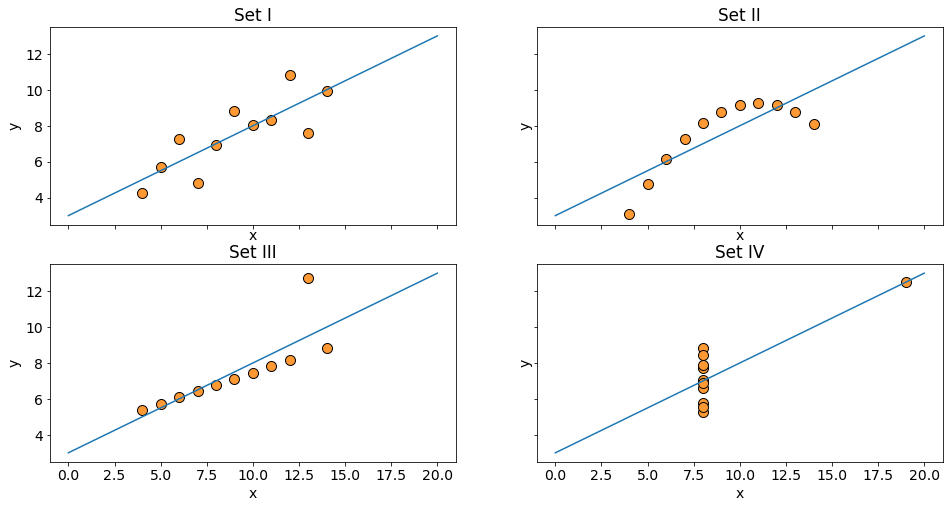

In [17]:
## Generating the subplots
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16,8))

## Picking the color at https://www.w3schools.com/colors/colors_picker.asp
_ = ax[0,0].scatter(data['Ix']  , data['Iy']  , s=100, c='#ff9933', edgecolors='k')
_ = ax[0,1].scatter(data['IIx'] , data['IIy'] , s=100, c='#ff9933', edgecolors='k')
_ = ax[1,0].scatter(data['IIIx'], data['IIIy'], s=100, c='#ff9933', edgecolors='k')
_ = ax[1,1].scatter(data['IVx'] , data['IVy'] , s=100, c='#ff9933', edgecolors='k')
_ = ax[0,0].set_xlabel('x')
_ = ax[0,1].set_xlabel('x')
_ = ax[1,0].set_xlabel('x')
_ = ax[1,1].set_xlabel('x')
_ = ax[0,0].set_ylabel('y')
_ = ax[0,1].set_ylabel('y')
_ = ax[1,0].set_ylabel('y')
_ = ax[1,1].set_ylabel('y')
_ = ax[0,0].set_title('Set I'  )
_ = ax[0,1].set_title('Set II' )
_ = ax[1,0].set_title('Set III')
_ = ax[1,1].set_title('Set IV' )

## We add the best fit
x = np.arange(21.)
_ = ax[0,0].plot(x, m_1*x+b_1)
_ = ax[0,1].plot(x, m_2*x+b_2)
_ = ax[1,0].plot(x, m_3*x+b_3)
_ = ax[1,1].plot(x, m_4*x+b_4)

## We save the figure
#fig.savefig('./images/anscombe_plot.pdf')

**Final note on the Anscombe Quartet**

As we can see, visualising the data with a plot is very insightful here to assess what type of model should be used.

Note that other statistical metrics suchs as the skewness and the curtosis would also have indicated differences (without necessarily telling which model to choose). Looking at the goodness of fit (i.e. $\chi^2$) may also help provided that the data have properly set errors. *(We will learn more on this in the coming lectures)*

<div class="queue">
    Lecture 3 - 00:07
</div>

## 2.2 Probabilities and random variables

### 2.2.1 Axioms of probability

Repeated measurements => degree of randomness => probability

Definitions:
- $\cap$: _intersection_, 'and'
- $\cup$: _union_, 'or'
- $\subset$: _subset_, set within bigger set
- $\emptyset$: empty _subset_

Probability following Kolmogorov (1933). Let us define set $\Omega = \{E_1, E_2, \dots \}$.

For subset $A$ of $\Omega$ such that $A \subset \Omega$: $P(A)$ is called probability and satisfies the three *axioms of probability*:

1. For subset $A$ such that $A \subset \Omega$, $P(A) \geq 0$
2. For disjoint subsets $A$ and $B$ (i.e. $A \cap B = \emptyset$), $P(A \cup B) = P(A) + P(B)$
3. $P(\Omega) = 1$

The following properties can be derived from these axioms:

- $P(\bar A) = 1 - P(A)$, where $\bar A$ is complement subset
- $P(A \cup \bar A) = 1$
- $0 \leq P(A) \leq 1$
- $P(\emptyset) = 0$
- If $A \subset B$ then $P(A) \leq P(B)$
- $P(A \cup B) = P(A) + P(B) - P(A \cap B)$

<div class="queue">
    Lecture 3 - 00:20
</div>

<div class="example">Example 1</div>

_Euler diagram_, illustrates a probability space.

<img src="images/1024px-Conditional_probability.svg.png" width="40%">

- $P(A) = 0.3 + 0.1 + 0.12 = 0.52$
- $P(B_2) = 0.12 + 0.04 = 0.16$
- $P(\bar A) = 0.34 + 0.1 + 0.04 = 0.48 = 1 - 0.52$
- $P(A \cup B_2) = 0.52 + 0.16 - 0.12 = 0.56$

<div class="queue">
    Lecture 3 - 00:25
</div>

### 2.2.2 Bayes theorem

#### Conditional probability
Conditional probability of $A$ given $B$ is:

\begin{equation}
  P(A \mid B) = \frac{P(A \cap B)}{P(B)}
\end{equation}

<div class="example">Example 1</div>

From Euler diagram:

- $P(A \mid B_1) = \frac{0.1}{0.1} = 1$
- $P(A \mid B_2) = \frac{0.12}{0.16} = 0.75$
- $P(A \mid B_3) = \frac{0}{0.1} = 0$.
- $P(A \mid B) = \frac{0.1 + 0.12}{0.1 + 0.12 + 0.04 + 0.1} = 0.61$

#### Derivation of Bayes theorem

Conditional probability of B given A:

\begin{equation}
  P(B \mid A) = \frac{P(B \cap A)}{P(A)}
\end{equation}

However, $P(A \cap B) = P(B \cap A)$. Combine the two conditional probabilities:

\begin{eqnarray}
  P(A \mid B) &=& \frac{P(A) P(B \mid A)}{P(B)} \\
         &=& \frac{P(A) P(B \mid A)}{\sum_i P(B \mid A_i) P(A_i)}
\end{eqnarray}

Second form if $B$ is made of multiple subsets.

**Bayes rule**. Often:

- $P: P(A \mid B)$, posterior
- $I: P(A)$, prior
- $\mathcal{L}: P(B \mid A)$, likelihood
- $E: P(B)$, evidence

Therefore:

\begin{equation}
  P = \frac{I \mathcal{L}}{E}
\end{equation}

<div class="queue">
    Lecture 3 - 00:40
</div>

### Case study: The maths behind screening tests

Let us investigate the maths behind medical screening tests...

*An over-the-counter test is available to diagnose some particular disease. One sees the following package on a shelf. They purchase it and get a positive test result once administered at home. What is the probability that they suffer from this particular disease?*

<img src="images/supertest.png" width="30%">

After reading the small prints on the instruction manual, they find the following:

```
Disease BlahBlah is a rare condition contracted from aliens, which affects 0.1% of the population. Infected individuals produce a special protein that our test has been designed to detect. Controlled laboratory studies demonstrated a test accuracy of 99% on patients suffering from the disease and a 3% false positive rate on non-infected patients.
```

The naive answer to this question is that they have a 99% probability of suffering from the disease. However, the correct answer is actually more subtle, **Bayes rule comes to the rescue** to help us work it out.

First, we need to know the fraction of the population that carries the disease. Let us consider for the example that 0.1% of the population is infected. That is, the prior probability to have the disease or not is:

\begin{eqnarray}
  P({\rm disease}) &=& 0.001 \\
  P({\rm no\,disease}) &=& 0.999
\end{eqnarray}

A test yields a positive result with probability 98% given that the person carries the disease:

\begin{eqnarray}
  P({\rm +} \mid {\rm disease}) &=& 0.99 \\
  P({\rm -} \mid {\rm disease}) &=& 0.01
\end{eqnarray}

and a probability of 3% of people test positive even if they do not have the disease:

\begin{eqnarray}
  P({\rm +} \mid {\rm no\,disease}) &=& 0.03 \\
  P({\rm -} \mid {\rm no\,disease}) &=& 0.97
\end{eqnarray}

The probability that someone taking the test has the disease if returning a positve result is therefore:

\begin{eqnarray}
  P({\rm disease} \mid {\rm +}) &=& \frac{P({\rm disease}) P({\rm +} \mid {\rm disease})}{P({\rm +})} \\
  P({\rm disease} \mid {\rm +}) &=& \frac{P({\rm disease}) P({\rm +} \mid {\rm disease})}{P({\rm disease}) P({\rm +} \mid {\rm disease}) + P({\rm no\,disease}) P({\rm +} \mid {\rm no\,disease})} \\
          &=& \frac{0.001 \cdot 0.99}{0.001 \cdot 0.99 + 0.999 \cdot 0.03} \\
          &=& 0.032
\end{eqnarray}

The answer is therefore 3.2%, not 98% as naively expected!

<div class="queue">
    Lecture 4 - 00:00
</div>

## 2.3 Probability distributions

### 2.3.1 General probability distributions

#### Continuous probability distribution

Observable $x \in \Omega$ can take continuous values. **Probability density function** (PDF) is probability of $x$ in interval $[x,x+dx]$:

\begin{equation}
  f(x) dx \,.
\end{equation}

As per axiom 3:

\begin{equation}
  \int_\Omega f(x) dx = 1
\end{equation}

*Ex: Odds ManU winning Manchester derby against ManCity.*

#### Discrete probability distribution

Observable $x \in \Omega$ can only take discrete values. **Probability mass function** (PMF) is probability of $x$:

\begin{equation}
  \sum_{x \, \in \, \Omega} f_X(x) = 1
\end{equation}

*Ex: Odds of rolling 6 on dice.*

<div class="queue">
    Lecture 4 - 00:10
</div>

### 2.3.2 Some important probability distributions

#### Binomial distribution

Process with identical trials with two outcomes.

Ex:

- Coin (head/tail)
- Quality control (pass/fail)
- Treatement in medecine (cure/no cure)

Define:

- $k$ number of successes
- $n$ number of trials
- $p$ probability of an individual success

##### PMF

\begin{equation}
  P(k;, n, p) = p^k (1-p)^{(n-k)} \frac{n!}{k!(n-k)!}
\end{equation}

##### Properties

Mean: $np$

Variance: $np(1-p)$

<div class="example">Example 1</div>

Toss coin four times. Possible outcomes?

| Outcome | Degeneracy | Probability |
| :-----: | :--------: | :---------: |
| HHHH    | 1          | 1/16        |
| HHHT    | 4          | 1/4         |
| HHTT    | 6          | 3/8         |
| HTTT    | 4          | 1/4         |
| TTTT    | 1          | 1/16        |

What is the probability of having one head out of four fair coin toss?

_The answer is $1/4$. Using the PMF:_

\begin{equation}
  P(1; 4, 0.5) = 0.5^1 (1-0.5)^{4-1} \frac{4!}{1! (4-1)!} = 0.25
\end{equation}

**Plotting the binomial distribution**

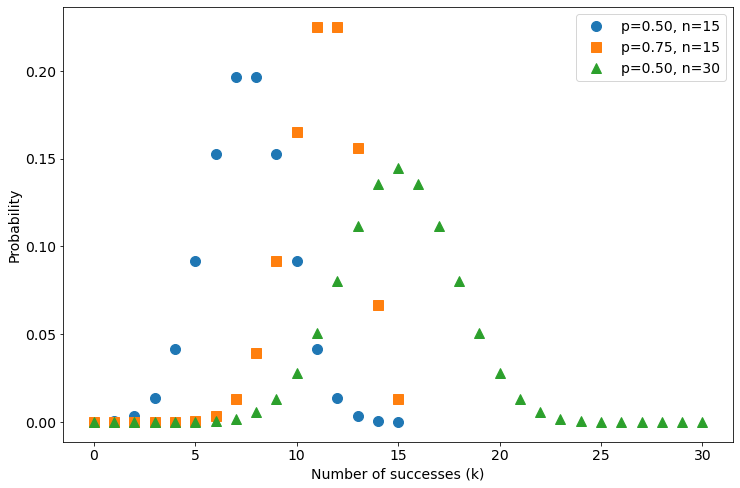

In [18]:
## Generating the subplots
fig, ax = plt.subplots(1, 1, figsize=(12,8))

## Generating the PMF for three cases. Note that we use implicit array operations instead of looping through k values.
n1 = 15
k1 = np.arange(n1+1)
p1 = 0.5
prob1 = scipy.stats.binom.pmf(k1, n1, p1)

n2 = 15
k2 = np.arange(n2+1)
p2 = 0.75
prob2 = scipy.stats.binom.pmf(k2, n2, p2)

n3 = 30
k3 = np.arange(n3+1)
p3 = 0.5
prob3 = scipy.stats.binom.pmf(k3, n3, p3)

## Plotting
_ = ax.plot(k1, prob1, '.', ms=20, label='p=0.50, n=15')
_ = ax.plot(k2, prob2, 's', ms=10, label='p=0.75, n=15')
_ = ax.plot(k3, prob3, '^', ms=10, label='p=0.50, n=30')
_ = ax.set_xlabel('Number of successes (k)')
_ = ax.set_ylabel('Probability')
_ = ax.legend()

## We save the figure
#fig.savefig('./images/binomial_pmf.pdf')

<div class="queue">
    Lecture 4 - 00:20
</div>

#### Poisson distribution

Process with number of events occurring in a given interval, with average occurance rate known and events independent.

Ex:

- Letters at home per day
- Phone calls at call centre between 9 and 10 am
- Number of X-ray photons received from binary system in a 1-min window

Define:

- $k$ number of events in interval
- $\lambda$ average event rate per interval

##### PMF

\begin{equation}
  P(k; \lambda) = e^{-\lambda} \frac{\lambda^k}{k!}
\end{equation}

##### Properties

Mean: $\lambda$

Variance: $\lambda$

<div class="example">Example 1</div>

In 1898, Russian economist Ladislaus Bortkiewicz published a book on statistics that included a study which has now become a classic example of Poisson statistics. The study looked into the number of annual deaths of soliders in the Prussian army by horse kicks from 1875 to 1894. In 14 different army cavalry corps, over this 20 years period, there were 196 deaths.

| Year | GC  | C1  | C2  | C3  | C4  | C5  | C6  | C7  | C8  | C9  | C10 | C11 | C14 | C15 |
| :--: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 1875 | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 1   | 1   | 0   | 0   | 0   | 1   | 0   |
| 1876 | 2   | 0   | 0   | 0   | 1   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 1   | 1   |
| 1877 | 2   | 0   | 0   | 0   | 0   | 0   | 1   | 1   | 0   | 0   | 1   | 0   | 2   | 0   |
| 1878 | 1   | 2   | 2   | 1   | 1   | 0   | 0   | 0   | 0   | 0   | 1   | 0   | 1   | 0   |
| 1879 | 0   | 0   | 0   | 1   | 1   | 2   | 2   | 0   | 1   | 0   | 0   | 2   | 1   | 0   |
| 1880 | 0   | 3   | 2   | 1   | 1   | 1   | 0   | 0   | 0   | 2   | 1   | 4   | 3   | 0   |
| 1881 | 1   | 0   | 0   | 2   | 1   | 0   | 0   | 1   | 0   | 1   | 0   | 0   | 0   | 0   |
| 1882 | 1   | 2   | 0   | 0   | 0   | 0   | 1   | 0   | 1   | 1   | 2   | 1   | 4   | 1   |
| 1883 | 0   | 0   | 1   | 2   | 0   | 1   | 2   | 1   | 0   | 1   | 0   | 3   | 0   | 0   |
| 1884 | 3   | 0   | 1   | 0   | 0   | 0   | 0   | 1   | 0   | 0   | 2   | 0   | 1   | 1   |
| 1885 | 0   | 0   | 0   | 0   | 0   | 0   | 1   | 0   | 0   | 2   | 0   | 1   | 0   | 1   |
| 1886 | 2   | 1   | 0   | 0   | 1   | 1   | 1   | 0   | 0   | 1   | 0   | 1   | 3   | 0   |
| 1887 | 1   | 1   | 2   | 1   | 0   | 0   | 3   | 2   | 1   | 1   | 0   | 1   | 2   | 0   |
| 1888 | 0   | 1   | 1   | 0   | 0   | 1   | 1   | 0   | 0   | 0   | 0   | 1   | 1   | 0   |
| 1889 | 0   | 0   | 1   | 1   | 0   | 1   | 1   | 0   | 0   | 1   | 2   | 2   | 0   | 2   |
| 1890 | 1   | 2   | 0   | 2   | 0   | 1   | 1   | 2   | 0   | 2   | 1   | 1   | 2   | 2   |
| 1891 | 0   | 0   | 0   | 1   | 1   | 1   | 0   | 1   | 1   | 0   | 3   | 3   | 1   | 0   |
| 1892 | 1   | 3   | 2   | 0   | 1   | 1   | 3   | 0   | 1   | 1   | 0   | 1   | 1   | 0   |
| 1893 | 0   | 1   | 0   | 0   | 0   | 1   | 0   | 2   | 0   | 0   | 1   | 3   | 0   | 0   |
| 1894 | 1   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 1   | 0   | 1   | 1   | 0   | 0   |

| number of deaths | number of occurrences |
| :--------------: | :-------------------: |
| 0                | 144                   |
| 1                | 91                    |
| 2                | 32                    |
| 3                | 11                    |
| 4                | 2                     |
| 5                | 0                     |
| 6                | 0                     |

Can these data be described by Poisson?

Death rate per corps per year is: $\lambda = 196/280 = 0.7$.

Probability of no deaths in a corps in a year is:

\begin{equation}
    P(0; 0.7) = e^{-0.7} \frac{0.7^0}{0!} = 0.4966
\end{equation}

To get number, we multiply the probability by 280 (number of trials): 139.04.

```
Actually 144 vs predicted 139.
```

**Plotting the Poisson distribution**

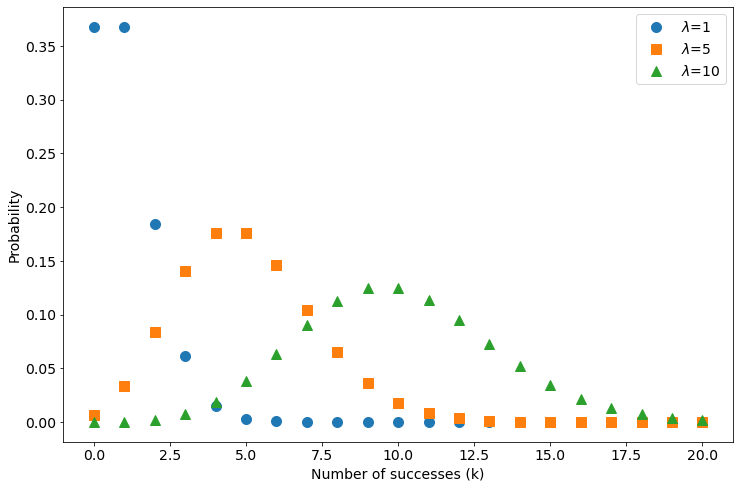

In [19]:
## Generating the subplots
fig, ax = plt.subplots(1, 1, figsize=(12,8))

## Generating the PMF for three cases. Note that we use implicit array operations instead of looping through k values.
n1 = 20
k1 = np.arange(n1+1)
rate1 = 1
prob1 = scipy.stats.poisson.pmf(k1, rate1)

n2 = 20
k2 = np.arange(n2+1)
rate2 = 5
prob2 = scipy.stats.poisson.pmf(k2, rate2)

n3 = 20
k3 = np.arange(n3+1)
rate3 = 10
prob3 = scipy.stats.poisson.pmf(k3, rate3)

## Plotting
_ = ax.plot(k1, prob1, '.', ms=20, label='$\lambda$=1')
_ = ax.plot(k2, prob2, 's', ms=10, label='$\lambda$=5')
_ = ax.plot(k3, prob3, '^', ms=10, label='$\lambda$=10')
_ = ax.set_xlabel('Number of successes (k)')
_ = ax.set_ylabel('Probability')
_ = ax.legend()

## We save the figure
#fig.savefig('./images/poisson_pmf.pdf')

<div class="queue">
    Lecture 4 - 00:30
</div>

#### Gaussian distribution

The *Gaussian distribution*, also known as normal distribution, is a continuous and symmetric probability distribution. It is possibly the most useful distribution in science and data science. One of the reasons is due to the fact that averages of samples of observations of random variables independently drawn from independent distributions converge in distribution to the normal -- this is called the central limit theorem, which we will investigate later. Also see [Normal distribution on Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution).

Examples of processes following the Gaussian distribution are:

- The mass of a bag of flour bought at the grocery store
- The distribution of heights of students in a core physics lecture course
- The gravitational constant derived from a pendulum experiment by the 1st year physics students

Let us define the following variables:
    
- $\mu$ the mean of the Gaussian (can be any real number)
- $\sigma$ the standard distribution of the Gaussian (can be any real positive number)

##### Probability density function
The Gaussian distribution (in this case the probability density function) is given by:

\begin{equation}
  P(x; \mu, \sigma) \sim \mathcal{N}(\mu, \sigma^2) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}

##### Important properties

Mean, median, mode: $\mu$

Variance: $\sigma^2$

**Plotting the Gaussian distribution**

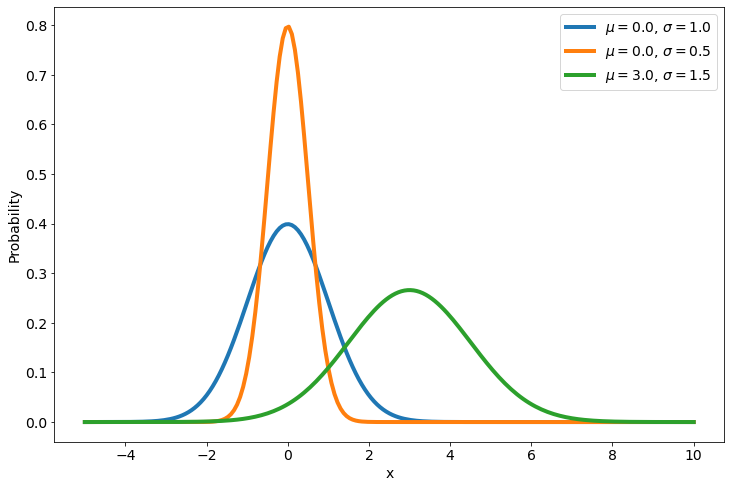

In [20]:
## Generating the subplots
fig, ax = plt.subplots(1, 1, figsize=(12,8))

## Generating the PMF for three cases. Note that we use implicit array operations instead of looping through k values.
mu1 = 0.
sigma1 = 1.
x1 = np.linspace(-5,10,201)
prob1 = scipy.stats.norm.pdf(x1, loc=mu1, scale=sigma1)

mu2 = 0.
sigma2 = 0.5
x2 = np.linspace(-5,10,201)
prob2 = scipy.stats.norm.pdf(x2, loc=mu2, scale=sigma2)

mu3 = 3.
sigma3 = 1.5
x3 = np.linspace(-5,10,201)
prob3 = scipy.stats.norm.pdf(x3, loc=mu3, scale=sigma3)

## Plotting
_ = ax.plot(x1, prob1, '-', lw=4, label='$\mu=0.0$, $\sigma=1.0$')
_ = ax.plot(x2, prob2, '-', lw=4, label='$\mu=0.0$, $\sigma=0.5$')
_ = ax.plot(x3, prob3, '-', lw=4, label='$\mu=3.0$, $\sigma=1.5$')
_ = ax.set_xlabel('x')
_ = ax.set_ylabel('Probability')
_ = ax.legend()

## We save the figure
#fig.savefig('./images/gaussian_pdf.pdf')

<div class="queue">
    Lecture 5 - 00:00
</div>

### Case study: Hurricane Harvey

Hurricane Harvey in 2017 is qualified as a once-in-a-century. First Category 4 hurricane to make landfall in Texas since Carla in 1961.

Requires casting the right question.

```
What are the odds of having two or more such hurricanes in the observed time span?
```

Probability of waiting less than 56 years to see another event after Carla took place? That is $p(k \geq 1) = 1 - p(k < 1) = 1 - p(k = 0)$.

**Method 1: Using Poisson**

With $\lambda = 0.56$ (i.e. 1 in 100 years implies 0.56 in 56 years):

\begin{equation}
  P(0; 0.56) = e^{-0.56} \frac{0.56^0}{0!} = 0.5712
\end{equation}

then:

\begin{equation}
  p(k >= 1) = 1 - 0.5712 = 0.4288 \,.
\end{equation}

**Method 2: Using Binomial**

With $p = 0.01$ (i.e. 0.01 chance in a year), and $n = 56$ trials. Since:

\begin{equation}
  P(0; 56, 0.01) = 0.01^0 (1-0.01)^{56-0} \frac{56!}{0! (56-0)!} = 0.5696
\end{equation}

then:

\begin{equation}
  p(k >= 1) = 1 - 0.5696 = 0.4304 \,.
\end{equation}

*Conclude that 43% chances for two such events to happen so close in time.* Certainly possible.

<div class="queue">
    Lecture 5 - 00:10
</div>

### 2.3.3 Gaussian distribution as a limit of Binomial and Poisson distributions

#### From Binomial to Poisson

Poisson is extension of binomial where unknown number of trials and events go from discrete to continuous. Ex: rolling a dice (discrete events) vs lightning flashes (time continuum).

Defining the event rate $\lambda = np$, and substituting $p$ into binomial:

\begin{equation}
  P(k; n, \lambda/n) = \frac{\lambda^k}{n^k} \left( 1 - \frac{\lambda}{n} \right)^{n-k} \frac{n!}{k!(n-k)!} \,.
\end{equation}

As $n \to \infty$

\begin{equation}
  P(k; n, \lambda/n) = \frac{\lambda^k}{k!} \lim_{n \to \infty} \left( \frac{1}{n^k} \right) \left( \frac{n!}{(n-k)!} \right) \left( 1 - \frac{\lambda}{n} \right)^{n} \left( 1 - \frac{\lambda}{n} \right)^{-k} \,.
\end{equation}

Considering the second term

\begin{equation}
  \lim_{n \to \infty} \frac{n!}{(n-k)!} = \lim_{n \to \infty} n(n-1)(n-2)...(n-k+1) = n^k \,,
\end{equation}

where the middle equality comprises $k$ elements. This cancels with the first term from above.

Recalling the definition of the $e$

\begin{equation}
  e = \lim_{x \to \infty} \left( 1 + \frac{1}{x} \right)^{x} \,,
\end{equation}

and making the change $x = -n/\lambda$, the third term becomes

\begin{equation}
  \lim_{n \to \infty} \left( 1 - \frac{\lambda}{n} \right)^{n} = \lim_{x \to \infty} \left( 1 + \frac{1}{x} \right)^{x (-\lambda)} = e^{-\lambda} \,.
\end{equation}

Considering the last term

\begin{equation}
  \lim_{n \to \infty} \left( 1 - \frac{\lambda}{n} \right)^{-k} = 1^{-k} = 1 \,.
\end{equation}

Putting them together

\begin{equation}
  P(k; \lambda) = e^{-\lambda} \frac{\lambda^k}{k!} \,,
\end{equation}

which is just the Poisson distribution.

#### From Poisson to Gaussian and Binomial to Gaussian

Both Binomial and Poisson distribution turn into Gaussian distributions in the limit where $n$ and $\lambda$ are infinity.

<img src="images/stats triad.png" width="40%">

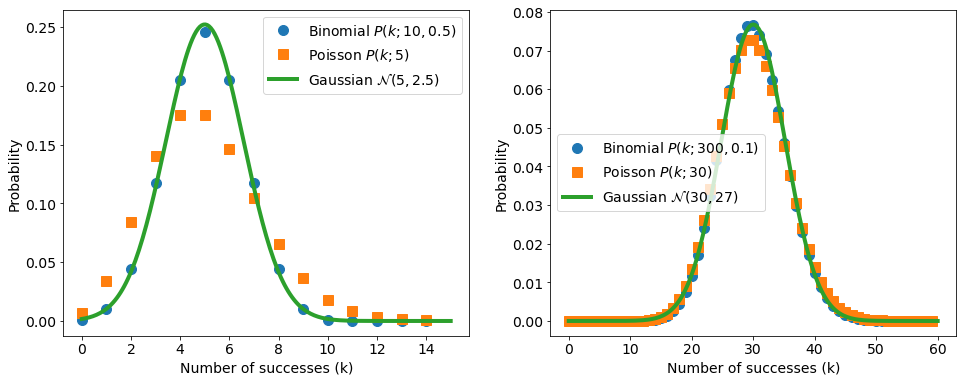

In [21]:
## Generating the subplots
fig, ax = plt.subplots(1, 2, figsize=(16,6))

## Generating the PMF for three cases (binomial, Poisson and Gaussian).
n1 = 10
p1 = 0.5
k1 = np.arange(n1*p1*3)
binom1 = scipy.stats.binom.pmf(k1, n1, p1)

rate1 = n1*p1
poisson1 = scipy.stats.poisson.pmf(k1, rate1)

mu1 = n1*p1
sigma1 = np.sqrt(n1*p1*(1-p1))
x1 = np.linspace(0,n1*p1*3,201)
gauss1 = scipy.stats.norm.pdf(x1, loc=mu1, scale=sigma1)

## Plotting
_ = ax[0].plot(k1, binom1, '.', ms=20, label='Binomial $P(k;10,0.5)$')
_ = ax[0].plot(k1, poisson1, 's', ms=10, label='Poisson $P(k;5)$')
_ = ax[0].plot(x1, gauss1, '-', lw=4, label='Gaussian $\mathcal{N}(5,2.5)$')
_ = ax[0].set_xlabel('Number of successes (k)')
_ = ax[0].set_ylabel('Probability')
_ = ax[0].legend()

## Generating the PMF for three cases (binomial, Poisson and Gaussian).
n2 = 300
p2 = 0.1
k2 = np.arange(n2*p2*2)
binom2 = scipy.stats.binom.pmf(k2, n2, p2)

rate2 = n2*p2
poisson2 = scipy.stats.poisson.pmf(k2, rate2)

mu2 = n2*p2
sigma2 = np.sqrt(n2*p2*(1-p2))
x2 = np.linspace(0,n2*p2*2,201)
gauss2 = scipy.stats.norm.pdf(x2, loc=mu2, scale=sigma2)

## Plotting
_ = ax[1].plot(k2, binom2, '.', ms=20, label='Binomial $P(k;300,0.1)$')
_ = ax[1].plot(k2, poisson2, 's', ms=10, label='Poisson $P(k;30)$')
_ = ax[1].plot(x2, gauss2, '-', lw=4, label='Gaussian $\mathcal{N}(30,27)$')
_ = ax[1].set_xlabel('Number of successes (k)')
_ = ax[1].set_ylabel('Probability')
_ = ax[1].legend()

## We save the figure
#fig.savefig('./images/gaussian_limit.pdf')

Without going into the full derivations, we can empirically see that from plots of the distributions. The full mathematical proof relates to the Central Limit Theorem (Chapter 3), but is beyond the scope of this course.

<div class="queue">
    Lecture 5 - 00:25
</div>

### 2.3.4 Other probability distributions

There are many more types of one-dimensional distributions. Here are some examples:

#### Uniform

Appears as a rather trivial distribution, where all values in an interval have equal probabilities. This is the basis of Monte Carlo techniques, and various sampling techniques.

#### Chi-squared ($\chi^2$)

The distribution of a sum of the squares of k independent standard normal random variables. Used for hypothesis testing (such as performing a linear regression).

#### Student's t-distribution

Frequency distribution of standard deviations of samples drawn from a normal population. Arises when estimating the mean of a normally distributed population in situations where the sample size is small and population standard deviation is unknown.

#### F-distribution

Distribution that arises when comparing statistical models that have been fitted to a data set, in order to identify the model that best fits the population from which the data were sampled. Typically involves data fitted with least squares.

<div class="queue">
    Lecture 5 - 00:30
</div>

#### Multivariate Gaussian

The *multivariate Gaussian* (or multivariate normal) is a generalization of the one-dimensional (univariate) normal distribution to higher dimensions. It is highly important for likelihood/Bayesian analysis.

\begin{equation}
  f(\underline{x}; \underline{\mu}, \underline{\underline{\Sigma}}) = \mathcal{N}_k(\underline{\mu}, \underline{\underline{\Sigma}}) = \frac{\exp\left(-\frac 1 2 (\underline{x}-\underline{\mu})^\mathrm{T}\underline{\underline{\Sigma}}^{-1}(\underline{x}-\underline{\mu})\right)}{\sqrt{(2\pi)^k \left| \underline{\underline{\Sigma}} \right|}}
\end{equation}

where:

$k$ is the number of dimensions

$\underline{x}$ is a $k$-dimension column vector

$\underline{\mu}$ is the $k$-dimension vector of means

$\underline{\underline{\Sigma}}$ is the covariance matrix

$\left| \underline{\underline{\Sigma}} \right| \equiv \operatorname{det}\underline{\underline{\Sigma}}$ is the determinant of $\underline{\underline{\Sigma}}$
<br>
<br>

##### Two-dimensional case
In two dimensions, for the variables $(x,y)$, the covariabe matrix can be written as:

\begin{equation}
    \underline{\underline{\Sigma}} = 
    \begin{bmatrix}
        \sigma_x^2 & \rho \sigma_x \sigma_y \\
        \rho \sigma_x \sigma_y & \sigma_y^2
    \end{bmatrix} \quad .
\end{equation}

Therefore

\begin{equation}
    \underline{\underline{\Sigma}}^{-1} = \frac{1}{\left(1-\rho^2\right)}
    \begin{bmatrix}
        \frac{1}{\sigma_x^2} & \frac{-\rho}{\sigma_x \sigma_y} \\
        \frac{-\rho}{\sigma_x \sigma_y} & \frac{1}{\sigma_y^2}
    \end{bmatrix} \quad ,
\end{equation}

and

\begin{equation}
    \left| \underline{\underline{\Sigma}} \right| = \sigma_x^2 \sigma_y^2 \left(1-\rho^2\right) \quad .
\end{equation}

The row vector $\left( \underline{x}-\underline{\mu} \right)$ is

\begin{equation}
    \left( \underline{x}-\underline{\mu} \right) =
        \begin{bmatrix}
            x - \mu_x \\
            y - \mu_y
        \end{bmatrix} \,.
\end{equation}

Putting it all together, and ensuring that the right order of priority is applied to matrix algebra, one obtains:

\begin{equation}
  f(x,y) = \frac{1}{2 \pi  \sigma_x \sigma_y \sqrt{1-\rho^2}}
    \exp\left(
      -\frac{1}{2(1-\rho^2)}\left[
          \frac{(x-\mu_x)^2}{\sigma_x^2} +
          \frac{(y-\mu_y)^2}{\sigma_y^2} -
          \frac{2\rho(x-\mu_x)(y-\mu_y)}{\sigma_x \sigma_y}
      \right]
    \right)
\end{equation}

<img src="images/MultivariateNormal.png" width=60% >

<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>